In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from tensorflow import keras
import warnings

%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('C:/Users/dhruv/Downloads/archive/creditcard.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

Time        V1        V2        V3        V4        V5        V6  \
count 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00   
mean   94813.86      0.00      0.00     -0.00      0.00     -0.00      0.00   
std    47488.15      1.96      1.65      1.52      1.42      1.38      1.33   
min        0.00    -56.41    -72.72    -48.33     -5.68   -113.74    -26.16   
25%    54201.50     -0.92     -0.60     -0.89     -0.85     -0.69     -0.77   
50%    84692.00      0.02      0.07      0.18     -0.02     -0.05     -0.27   
75%   139320.50      1.32      0.80      1.03      0.74      0.61      0.40   
max   172792.00      2.45     22.06      9.38     16.88     34.80     73.30   

             V7        V8        V9  ...       V21       V22       V23  \
count 284807.00 284807.00 284807.00  ... 284807.00 284807.00 284807.00   
mean      -0.00     -0.00     -0.00  ...      0.00      0.00      0.00   
std        1.24      1.19      1.10  ...      0.73      0.73      0.62   
min      -43.56    -73.22    -13.43  ...    -34.83    -10.93    -44.81   
25%       -0.55     -0.21     -0.64  ...     -0.23     -0.54     -0.16   
50%        0.04      0.02     -0.05  ...     -0.03      0.01     -0.01   
75%        0.57      0.33      0.60  ...      0.19      0.53      0.15   
max      120.59     20.01     15.59  ...     27.20     10.50     22.53   

            V24       V25       V26       V27       V28    Amount     Class  
count 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00  
mean       0.00      0.00      0.00     -0.00     -0.00     88.35      0.00  
std        0.61      0.52      0.48      0.40      0.33    250.12      0.04  
min       -2.84    -10.30     -2.60    -22.57    -15.43      0.00      0.00  
25%       -0.35     -0.32     -0.33     -0.07     -0.05      5.60      0.00  
50%        0.04      0.02     -0.05      0.00      0.01     22.00      0.00  
75%        0.44      0.35      0.24      0.09      0.08     77.16      0.00  
max        4.58      7.52      3.52     31.61     33.85  25691.16      1.00  

[8 rows x 31 columns]

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
group = data.groupby('Class')['Time'].count()
fig = go.Figure()
fig.add_trace(go.Bar(name='counts',x=group.index, y=group.values, marker_line_color='black', marker_line_width=2,
                     text=group.values,textposition='outside'))
fig.update_yaxes(title_text='Number of Cases')
fig.update_xaxes(title_text='Case',nticks=3)
fig.update_layout(template='seaborn',hovermode='closest',title='Number of Fraud vs Non-Fraud Cases',
                 width=700,height=400,xaxis=dict(mirror=True,linecolor='black',linewidth=2),
                 yaxis=dict(mirror=True,linecolor='black',linewidth=2),margin=dict(t=50,b=0,l=70,r=0))
fig.show()

In [9]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [11]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

Amount    Amount
count  492.00 284315.00
mean   122.21     88.29
std    256.68    250.11
min      0.00      0.00
25%      1.00      5.65
50%      9.25     22.00
75%    105.89     77.05
max   2125.87  25691.16

In [12]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

Time      Time
count    492.00 284315.00
mean   80746.81  94838.20
std    47835.37  47484.02
min      406.00      0.00
25%    41241.50  54230.00
50%    75568.50  84711.00
75%   128483.00 139333.00
max   170348.00 172792.00

### Finding correlation between features original dataset 

#### This heatmap is built on top of the original dataset.The original dataset is an imbalanced dataset with 99.83:0.17 ratio of Non-fraudulant is to Fraudulant transactions respectively. Hence, it is not a good indicator of what features influence a transaction to be fraudulant.The same can be seen through the heapmap as well as majority of the features show no correlation at all.

<AxesSubplot:>

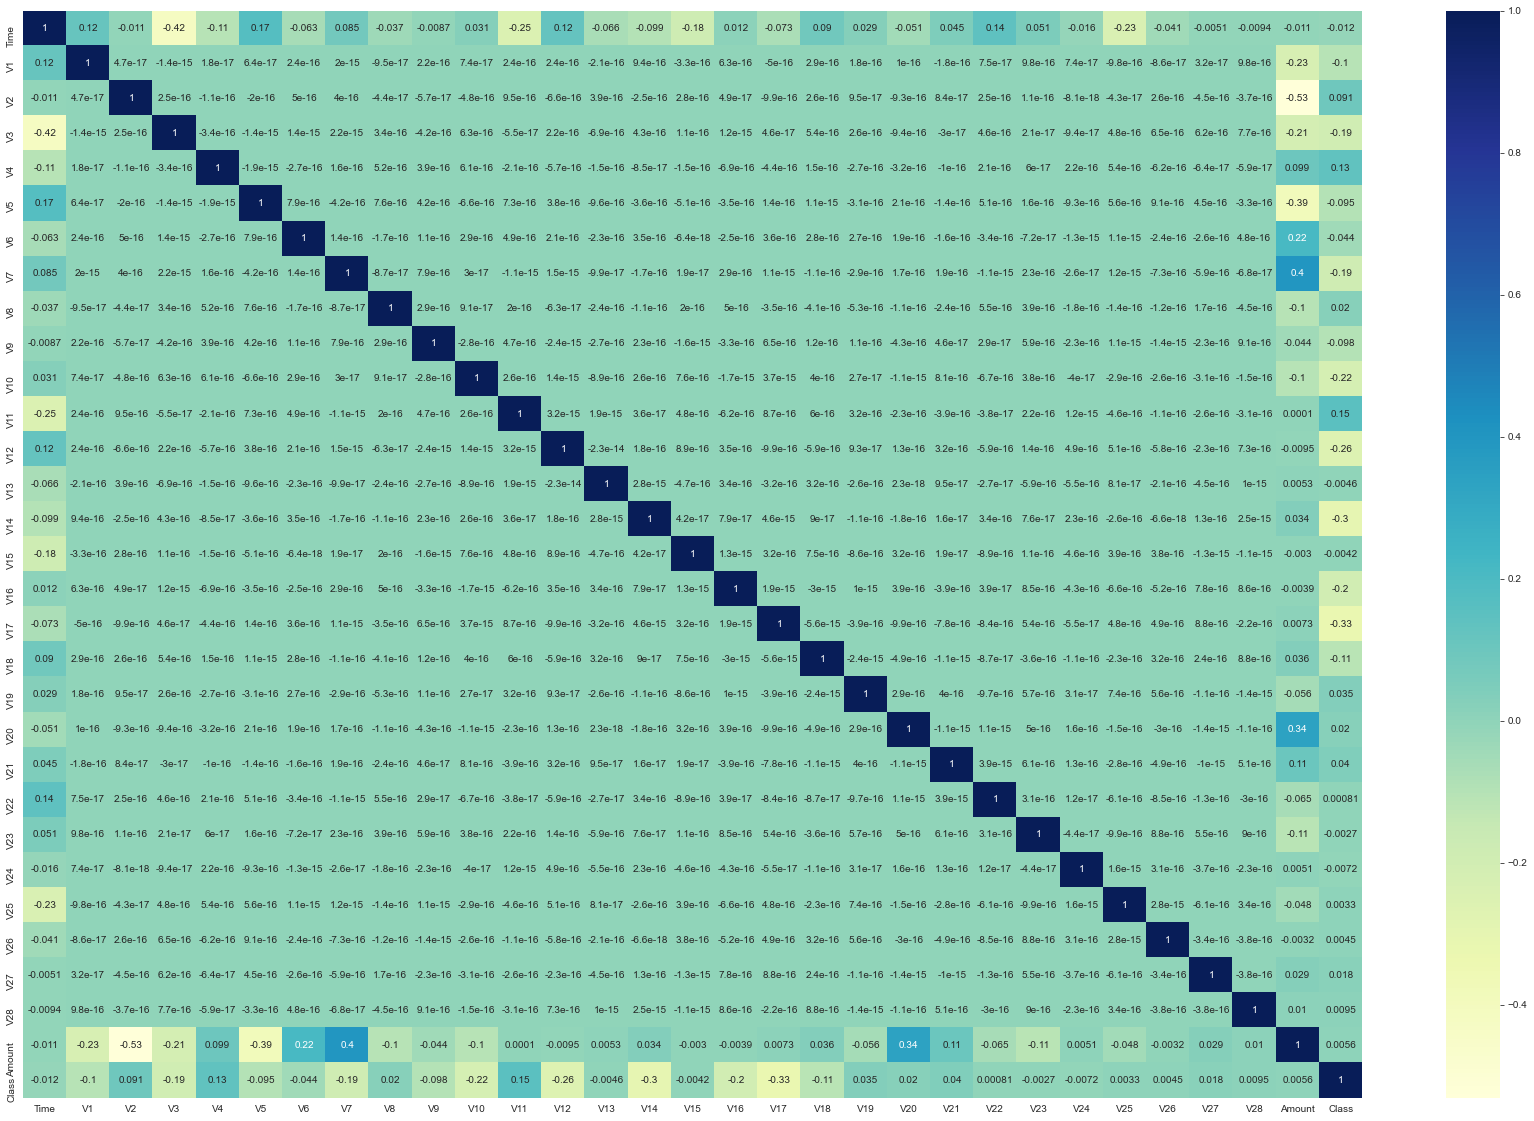

In [7]:
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

####  As shown above Feature V7 and Amount has the highest correlation with 0.4 and followed by V20 and Amount with 0.34 for original dataset

### We undersampled data and there are equal amounts of Fraud and Non fraud observations¶

In [10]:
Xi = data.iloc[:, :-1]
yi = data['Class']
und = RandomUnderSampler()
X_und, y_und = und.fit_resample(Xi*4, yi)

In [11]:
# Lets concat undersampled X and y
df_undersampled = pd.concat([X_und, y_und], axis=1)
df_undersampled.head()

Time        V1        V2        V3        V4        V5        V6  \
0  234952.0 -3.112096 -1.092033  9.908464 -6.291427 -3.930487  0.784378   
1  550168.0  8.079226 -3.757632 -0.004421 -3.084066 -4.973162 -0.237820   
2  648104.0 -2.456089  0.949649  0.434866 -5.349246  8.002423 -0.539711   
3  305040.0 -5.318351  3.386593  6.061636 -4.551967 -0.894158  8.039146   
4  511972.0  8.536209 -3.621027 -7.377338 -5.688604  2.316350  4.509133   

         V7         V8        V9  ...        V21       V22       V23  \
0 -1.725338   1.879464 -2.949726  ...  -0.823287 -0.569922 -0.832552   
1 -5.457649   1.075282  9.200121  ...   0.707723  2.605367  1.158347   
2  2.727440   0.351031 -1.877113  ...  -0.668219 -2.700348 -0.158665   
3 -6.931881 -11.114014 -4.230392  ...  13.532596  0.397361 -1.695099   
4 -3.045957   1.218703 -2.755454  ...   2.007917  6.020692  0.096109   

        V24       V25       V26       V27       V28  Amount  Class  
0  0.881266  0.185523  4.304505 -0.032753  0.156118   51.96      0  
1  2.517577 -2.341358  2.649403 -0.034458 -0.149880    4.00      0  
2 -1.400926 -1.442316  0.201595  0.224345  0.640209    7.92      0  
3 -5.075922  2.078434  1.154631  1.181507  0.341398   76.68      0  
4 -3.594453  0.229618  0.611554 -0.000875 -0.357344   13.88      0  

[5 rows x 31 columns]

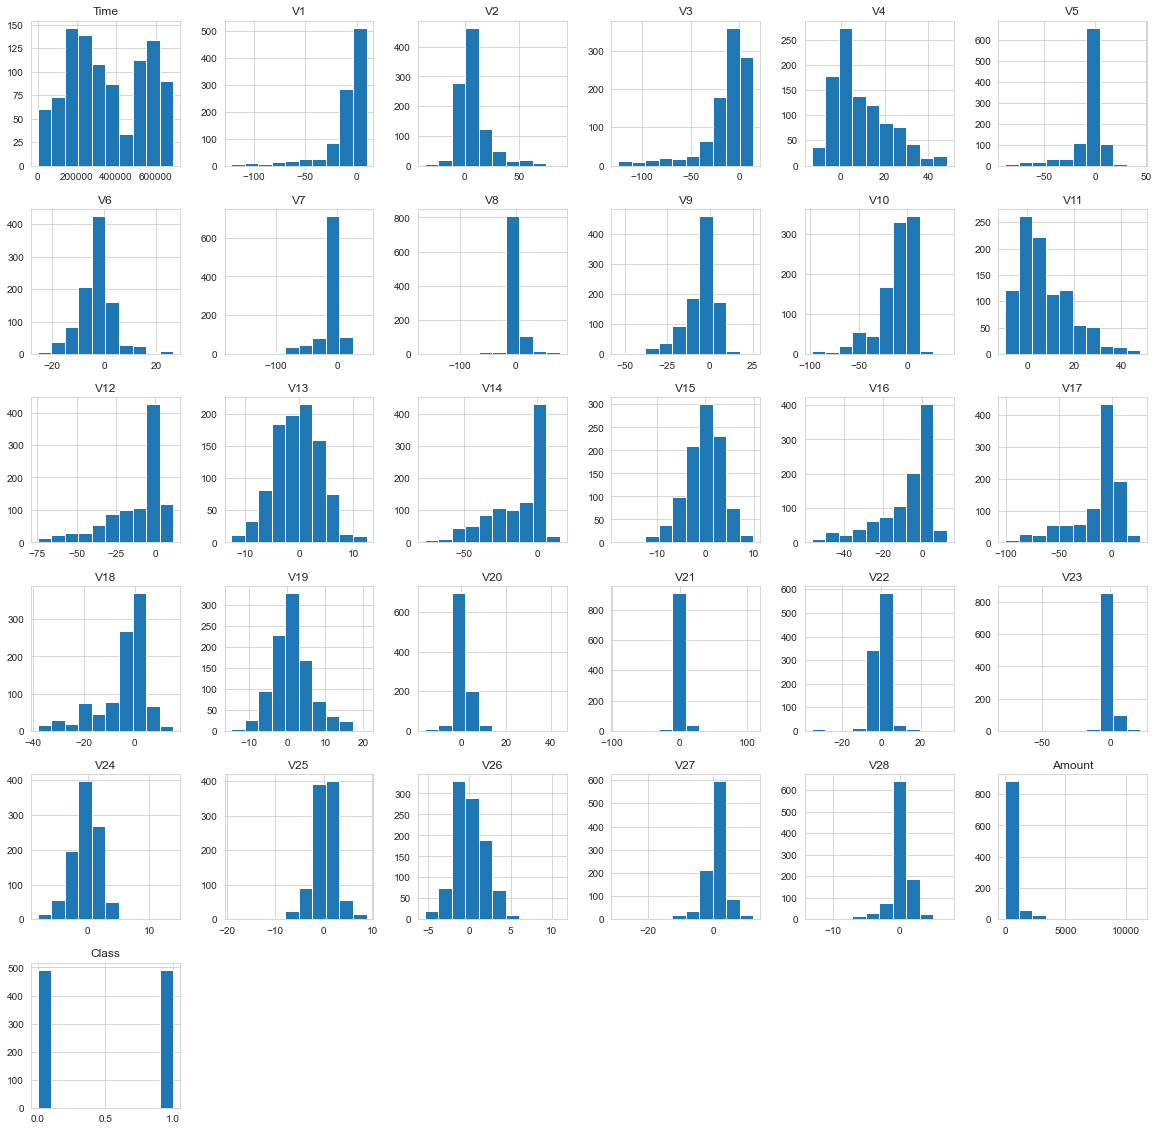

In [12]:
df_undersampled.hist(figsize = (20, 20))
plt.show()

### Let's Visualize the correlation again with the dataframe which is undersampled

#### In order to get a better view of what features influence a transaction to be fraudulant, it would be best to plot a heatmap on top of the randomly undersampled dataset where the class distribution(fraud vs non-fraud) is equal. As can be seen through the figure this heatmap shows a lot of correlation between the various features.

<AxesSubplot:>

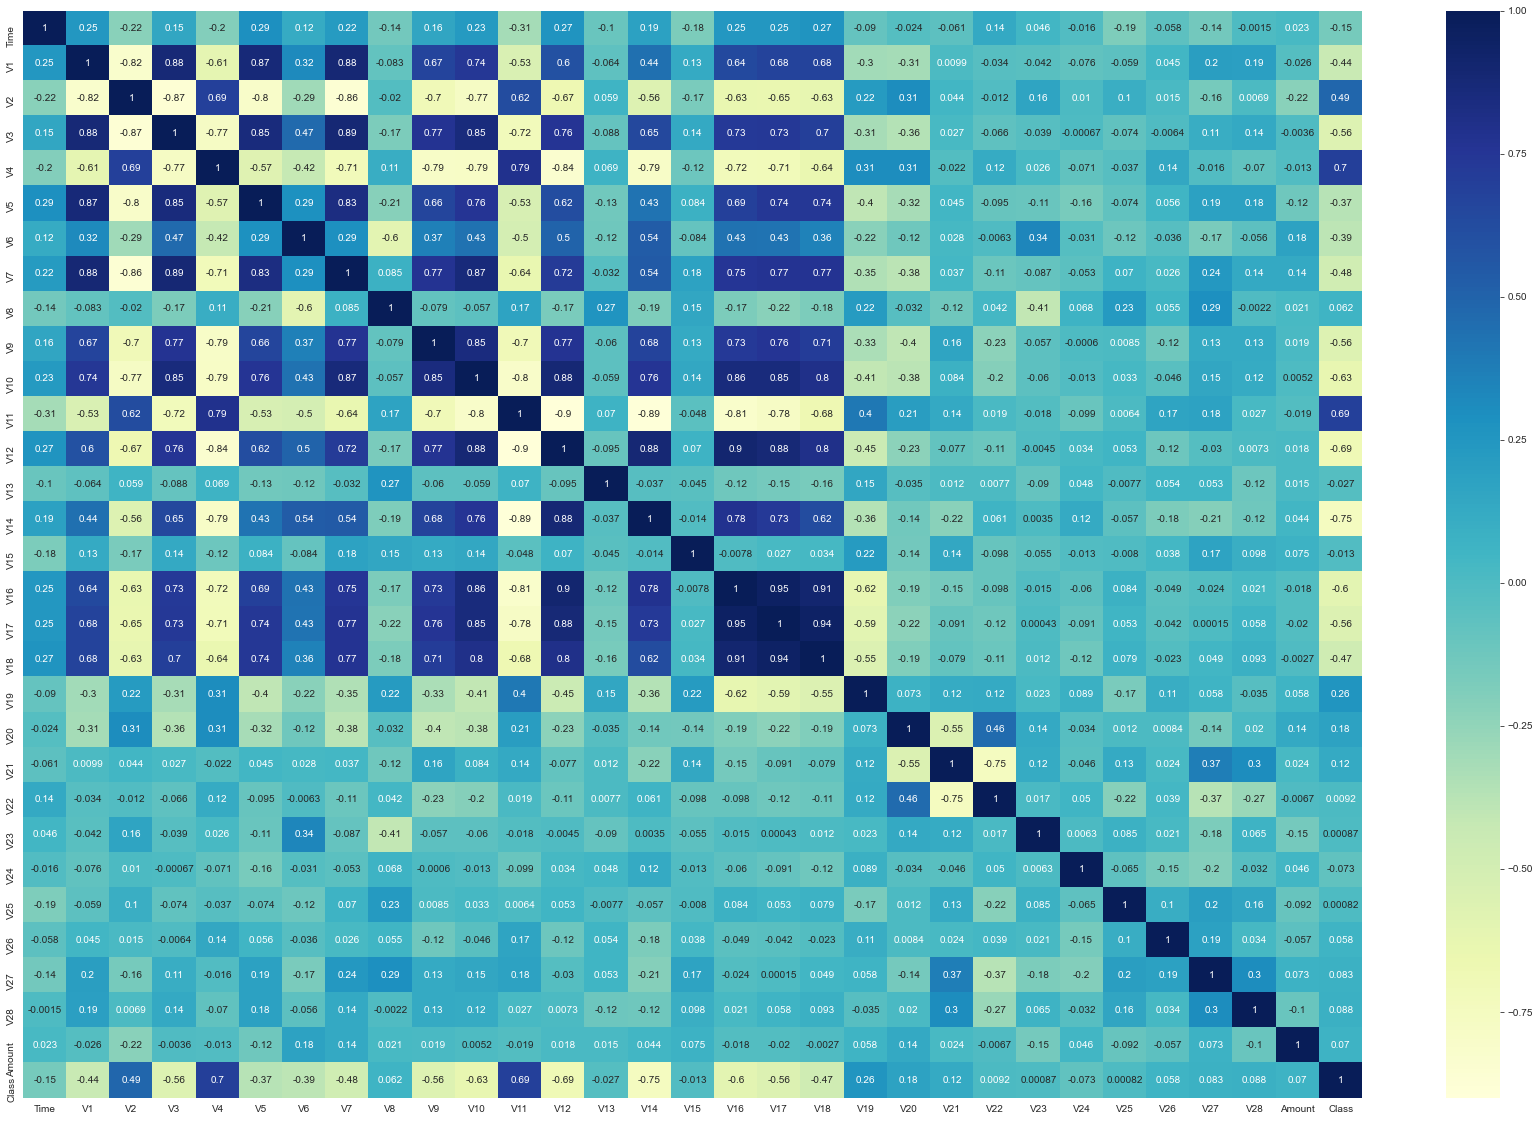

In [13]:
plt.figure(figsize=(30, 20))
sns.heatmap(df_undersampled.corr(),annot=True, cmap="YlGnBu")

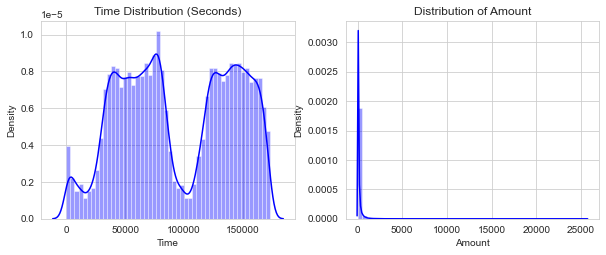

In [13]:
# plot the time feature
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(data['Amount'],color='blue');

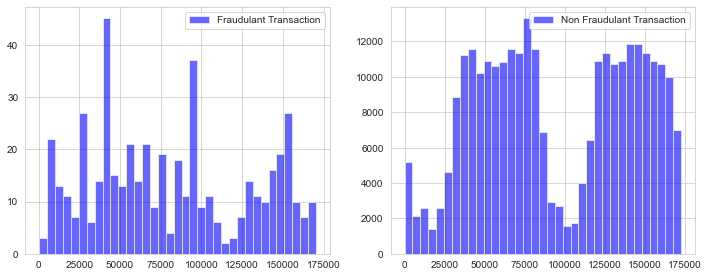

In [14]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

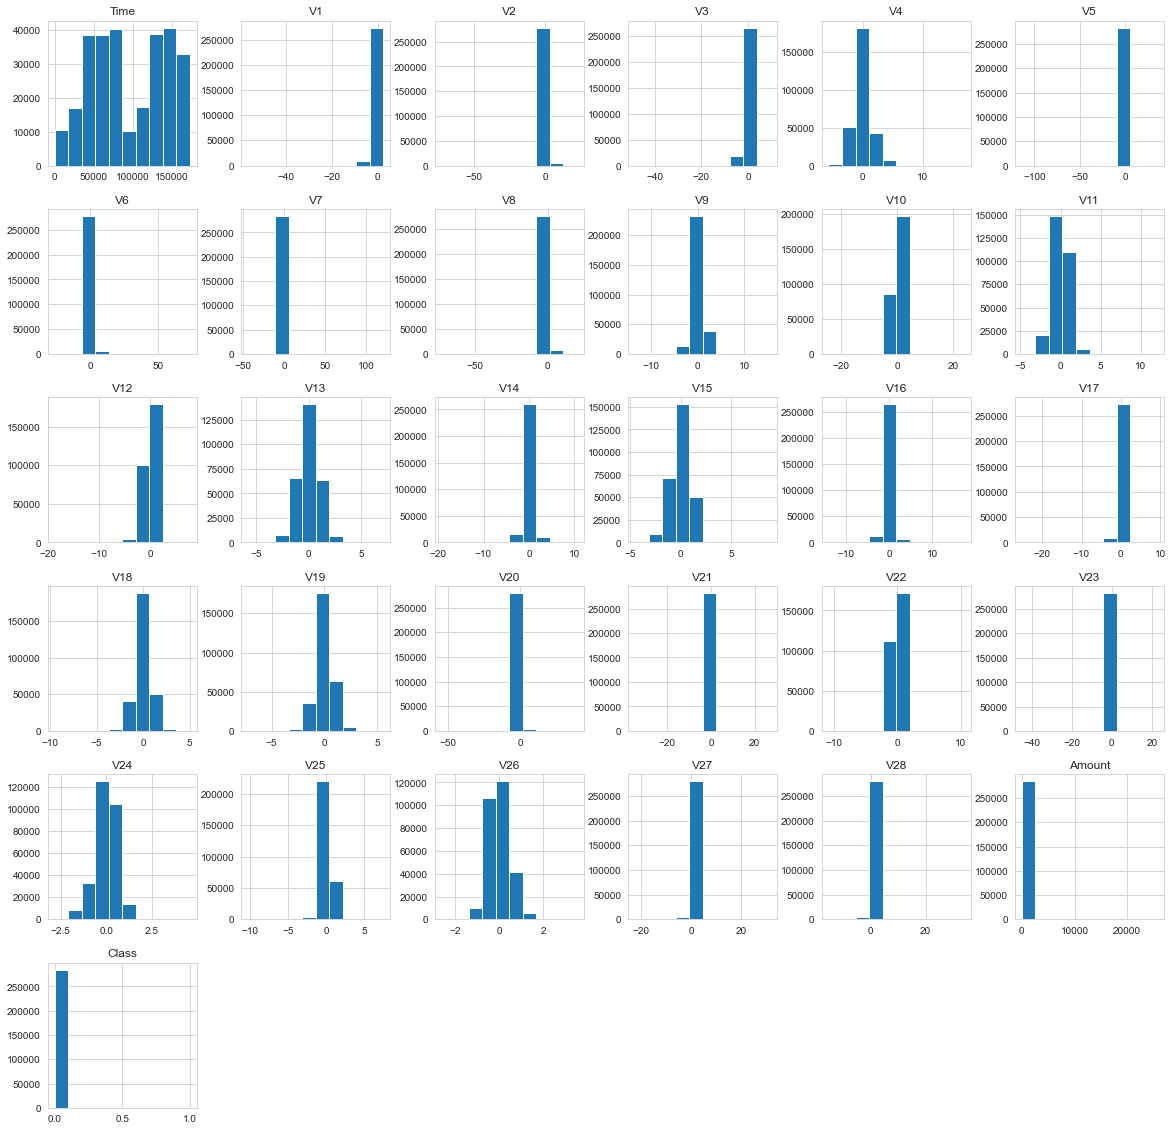

In [15]:
data.hist(figsize=(20, 20));

### Features density plot

<Figure size 432x288 with 0 Axes>

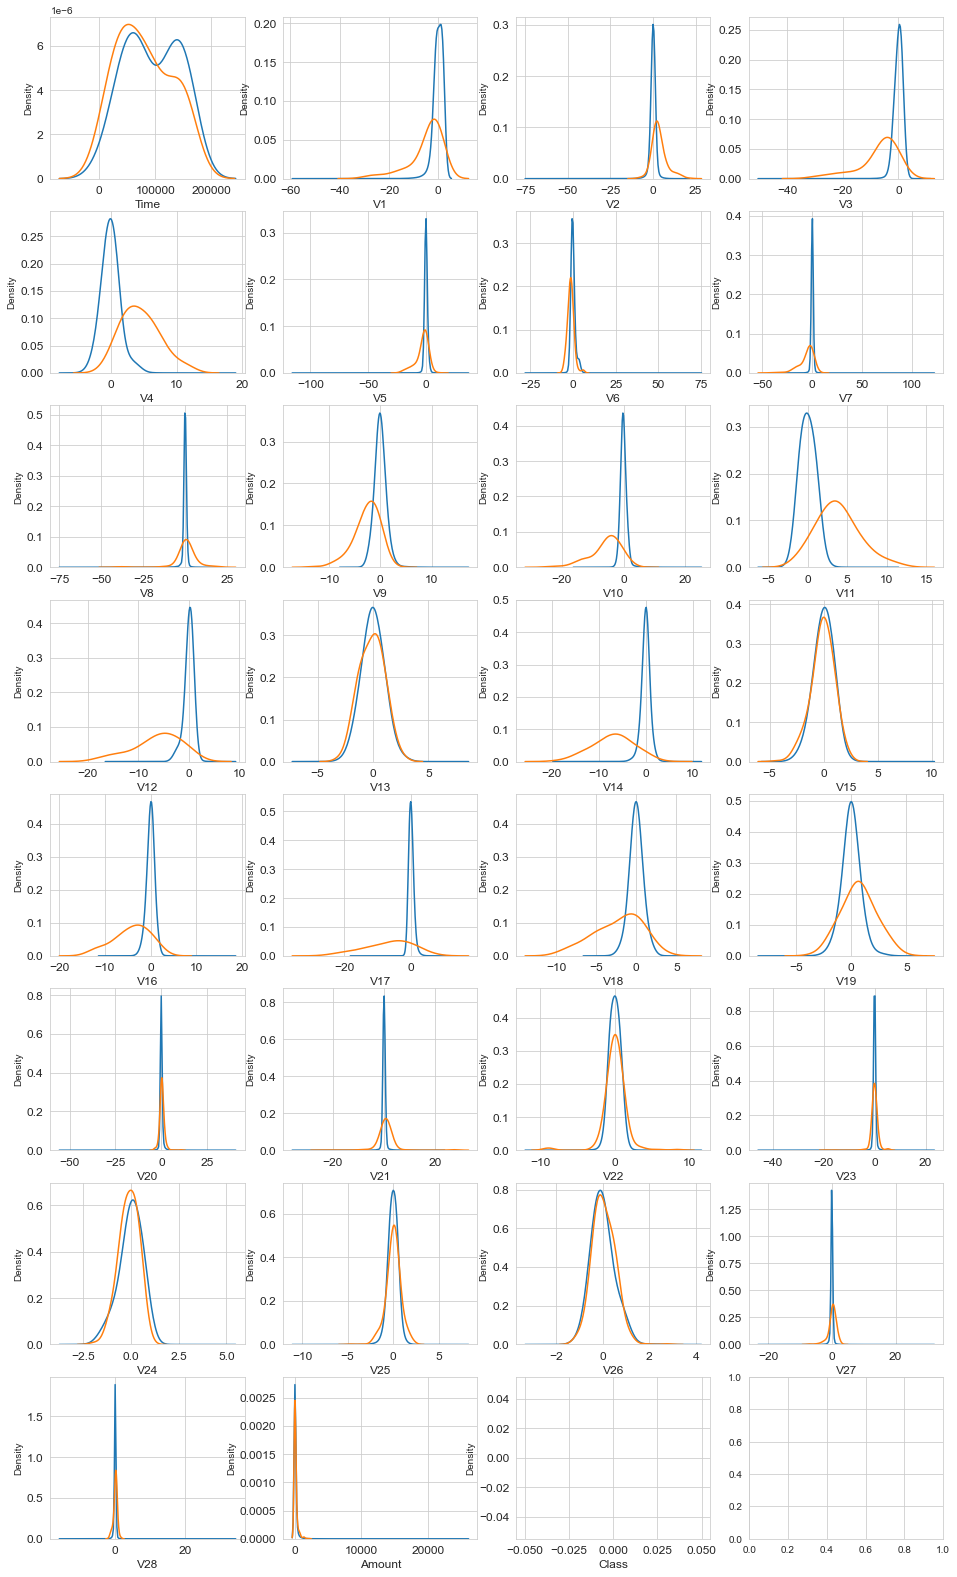

In [17]:
#Features density plot
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

### Histograms

In [19]:
rows = 2
cols = 4
fig = make_subplots(rows=rows,cols=cols,vertical_spacing=0.15,
                    subplot_titles=['V2 Distribution', 'V4 Distribution', 'V11 Distribution', 'V19 Distribution',
                                                 'V10 Distribution', 'V12 Distribution', 'V14 Distribution', 'V17 Distribution'])
features = ['V2','V4','V11','V19','V10','V12','V14','V17']
for r in range(1,rows+1):
    for c in range(1, cols+1):
        fig.add_trace(go.Histogram(name=features[r+c-2],x=data.loc[data.Class==1,features[r+c-2]]),r,c)
        fig.update_xaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
        fig.update_yaxes(mirror=True,linewidth=2,linecolor='black',row=r,col=c)
fig.update_layout(template='seaborn',title='Feature Distributions for Fraud Transactions')
fig.show()

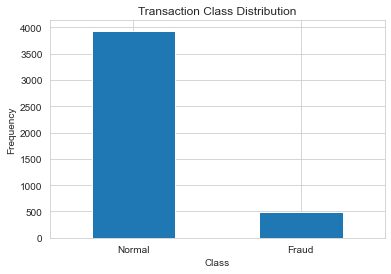

In [23]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud*8, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(under_sample_data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = under_sample_data.drop('Class', axis=1)
y = under_sample_data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_positive = y_train.value_counts()[0] / len(y_train)
w_negative = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_positive}")
print(f"Non-Fraudulant transaction weight: {w_negative}")

Fraudulant transaction weight: 0.891085114965712
Non-Fraudulant transaction weight: 0.10891488503428802


In [61]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (2479, 30), y_train: (2479,)
_______________________________________________________
VALIDATION: X_validate: (620, 30), y_validate: (620,)
__________________________________________________
TESTING: X_test: (1329, 30), y_test: (1329,)


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [29]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               7936      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [31]:
METRICS = [

    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_positive, 1:w_negative}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=100, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/100
2/2 [==============================] - 4s 999ms/step - loss: 0.9294 - fn: 124.0000 - fp: 1083.3333 - tn: 1001.3333 - tp: 126.6667 - precision: 0.1040 - recall: 0.5022 - val_loss: 0.6798 - val_fn: 2.0000 - val_fp: 322.0000 - val_tn: 237.0000 - val_tp: 59.0000 - val_precision: 0.1549 - val_recall: 0.9672
Epoch 2/100
2/2 [==============================] - 0s 69ms/step - loss: 0.5692 - fn: 27.0000 - fp: 592.3333 - tn: 1491.3333 - tp: 224.6667 - precision: 0.2745 - recall: 0.8934 - val_loss: 0.6719 - val_fn: 2.0000 - val_fp: 271.0000 - val_tn: 288.0000 - val_tp: 59.0000 - val_precision: 0.1788 - val_recall: 0.9672
Epoch 3/100
2/2 [==============================] - 0s 69ms/step - loss: 0.4240 - fn: 24.6667 - fp: 370.0000 - tn: 1710.0000 - tp: 230.6667 - precision: 0.3837 - recall: 0.9034 - val_loss: 0.6425 - val_fn: 3.0000 - val_fp: 179.0000 - val_tn: 380.0000 - val_tp: 58.0000 - val_precision: 0.2447 - val_recall: 0.9508
Epoch 4/100
2/2 [==============================] - 0s 68ms

In [32]:
score = model.evaluate(X_test, y_test)
print(score)

42/42 [==============================] - 0s 2ms/step - loss: 0.0929 - fn: 25.0000 - fp: 2.0000 - tn: 1166.0000 - tp: 136.0000 - precision: 0.9855 - recall: 0.8447
[0.09287980943918228, 25.0, 2.0, 1166.0, 136.0, 0.9855072498321533, 0.8447204828262329]


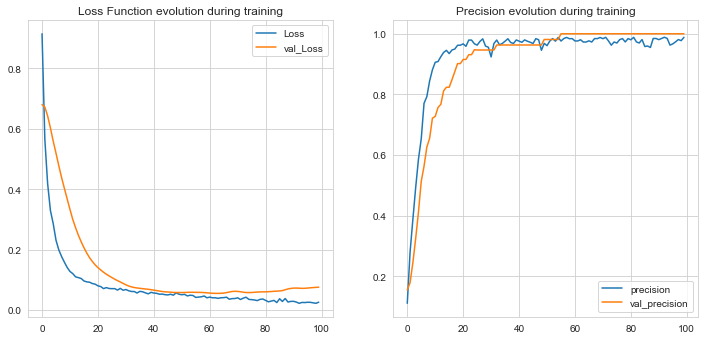

In [33]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()


plt.subplot(2, 2, 2)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()


In [49]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

Train Result:
Accuracy Score: 98.67%
_______________________________________________
Classification Report:
                0      1  accuracy  macro avg  weighted avg
precision    0.99   1.00      0.99       0.99          0.99
recall       1.00   0.88      0.99       0.94          0.99
f1-score     0.99   0.93      0.99       0.96          0.99
support   2209.00 270.00      0.99    2479.00       2479.00
_______________________________________________
Confusion Matrix: 
 [[2209    0]
 [  33  237]]

Test Result:
Accuracy Score: 98.42%
_______________________________________________
Classification Report:
                0      1  accuracy  macro avg  weighted avg
precision    0.98   0.99      0.98       0.99          0.98
recall       1.00   0.88      0.98       0.94          0.98
f1-score     0.99   0.93      0.98       0.96          0.98
support   1168.00 161.00      0.98    1329.00       1329.00
_______________________________________________
Confusion Matrix: 
 [[1167    1]
 [  20  

### XGBoost

In [67]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                0      1  accuracy  macro avg  weighted avg
precision    1.00   1.00      1.00       1.00          1.00
recall       1.00   1.00      1.00       1.00          1.00
f1-score     1.00   1.00      1.00       1.00          1.00
support   2209.00 270.00      1.00    2479.00       2479.00
_______________________________________________
Confusion Matrix: 
 [[2209    0]
 [   0  270]]

Test Result:
Accuracy Score: 97.89%
_______________________________________________
Classification Report:
                0      1  accuracy  macro avg  weighted avg
precision    0.99   0.93      0.98       0.96          0.98
recall       0.99   0.89      0.98       0.94          0.98
f1-score     0.99   0.91      0.98       0.95          0.98
support   1168.00 161.00      0.98    1329.00       1329.00
_______________________________________________
Confusion Matrix: 
 [[1157   11]
 [  17 

In [68]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.015181
0:	learn: 0.6657636	total: 141ms	remaining: 2m 20s
1:	learn: 0.6422022	total: 144ms	remaining: 1m 11s
2:	learn: 0.6179851	total: 147ms	remaining: 48.9s
3:	learn: 0.5968522	total: 150ms	remaining: 37.5s
4:	learn: 0.5721397	total: 154ms	remaining: 30.6s
5:	learn: 0.5485049	total: 157ms	remaining: 26s
6:	learn: 0.5285957	total: 160ms	remaining: 22.7s
7:	learn: 0.5088510	total: 164ms	remaining: 20.3s
8:	learn: 0.4902332	total: 167ms	remaining: 18.4s
9:	learn: 0.4714074	total: 170ms	remaining: 16.9s
10:	learn: 0.4513179	total: 173ms	remaining: 15.6s
11:	learn: 0.4333548	total: 177ms	remaining: 14.5s
12:	learn: 0.4158249	total: 181ms	remaining: 13.7s
13:	learn: 0.4017153	total: 184ms	remaining: 13s
14:	learn: 0.3861044	total: 188ms	remaining: 12.3s
15:	learn: 0.3721364	total: 191ms	remaining: 11.8s
16:	learn: 0.3558219	total: 195ms	remaining: 11.3s
17:	learn: 0.3441860	total: 198ms	remaining: 10.8s
18:	learn: 0.3302835	total: 202ms	remaining: 10.4s
19:	learn: 0.

In [69]:
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                0      1  accuracy  macro avg  weighted avg
precision    1.00   1.00      1.00       1.00          1.00
recall       1.00   1.00      1.00       1.00          1.00
f1-score     1.00   1.00      1.00       1.00          1.00
support   2209.00 270.00      1.00    2479.00       2479.00
_______________________________________________
Confusion Matrix: 
 [[2209    0]
 [   0  270]]

Test Result:
Accuracy Score: 98.42%
_______________________________________________
Classification Report:
                0      1  accuracy  macro avg  weighted avg
precision    0.99   0.97      0.98       0.98          0.98
recall       1.00   0.89      0.98       0.95          0.98
f1-score     0.99   0.93      0.98       0.96          0.98
support   1168.00 161.00      0.98    1329.00       1329.00
_______________________________________________
Confusion Matrix: 
 [[1164    4]
 [  17 

In [70]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(random_state=1)
Ada.fit(X_train, y_train)
y_train_pred = Ada.predict(X_train)
y_test_pred = Ada.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['AdaBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 98.87%
_______________________________________________
Classification Report:
                0      1  accuracy  macro avg  weighted avg
precision    0.99   0.97      0.99       0.98          0.99
recall       1.00   0.92      0.99       0.96          0.99
f1-score     0.99   0.95      0.99       0.97          0.99
support   2209.00 270.00      0.99    2479.00       2479.00
_______________________________________________
Confusion Matrix: 
 [[2202    7]
 [  21  249]]

Test Result:
Accuracy Score: 97.37%
_______________________________________________
Classification Report:
                0      1  accuracy  macro avg  weighted avg
precision    0.99   0.88      0.97       0.94          0.97
recall       0.98   0.90      0.97       0.94          0.97
f1-score     0.98   0.89      0.97       0.94          0.97
support   1168.00 161.00      0.97    1329.00       1329.00
_______________________________________________
Confusion Matrix: 
 [[1149   19]
 [  16  

Text(0.5, 1.0, 'Training and Testing Accuracy Plot')

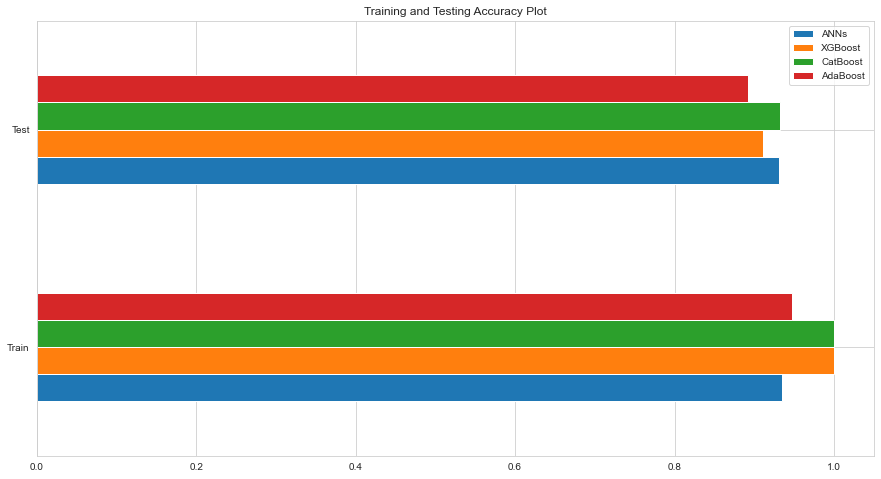

In [80]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(15, 8))
plt.title('Training and Testing Accuracy Plot')